In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_blobs(n_samples=100, centers=2,  random_state=6)

In [7]:
X

array([[  8.21597398,  -2.28672255],
       [  5.42916264,  -9.28019465],
       [  7.4816983 ,  -2.96403632],
       [  7.93333064,  -3.51553205],
       [  7.29573215,  -4.39392379],
       [  5.73072844,  -2.60895506],
       [  7.9683312 ,  -3.23125265],
       [  6.70309926,  -9.59360762],
       [  7.83762169,  -1.69756104],
       [  7.69483605,  -2.63359393],
       [  6.3649649 ,  -8.97189915],
       [  9.24223825,  -3.88003098],
       [  9.07568367,  -4.21790533],
       [  7.11707557,  -8.20473416],
       [  5.22323107,  -8.27441475],
       [  8.21073365,  -4.00374119],
       [  6.94147717,  -8.23721012],
       [  6.54118443,  -9.84832481],
       [  9.42169269,  -2.6476988 ],
       [  5.97933839,  -9.30802671],
       [  5.20200675,  -8.34325489],
       [  8.07502382,  -4.25949569],
       [  7.80996597,  -4.80944368],
       [  8.03349337,  -2.26578348],
       [  7.20721285,  -9.65948603],
       [  6.36448985,  -9.73455578],
       [  6.47613341,  -9.38565474],
 

In [8]:
y

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [4]:
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

SVC(C=1000, kernel='linear')

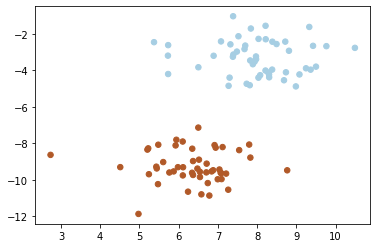

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2,
random_state=0)
print('Shape of X_train : ' , X_train.shape)
print('Shape of y_train : ' , y_train.shape)
print('Shape of X_test : ' , X_test.shape)
print('Shape of y_test : ' , y_test.shape)

Shape of X_train :  (80, 2)
Shape of y_train :  (80,)
Shape of X_test :  (20, 2)
Shape of y_test :  (20,)


In [11]:
 clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
 print('Score : ' , clf.score(X_test, y_test))
 

Score :  1.0


In [12]:
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print("%0.2f accuracy " % (scores.mean()))

[1. 1. 1. 1. 1.]
1.00 accuracy 


In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [15]:
model = SVC()

In [16]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000],
 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
 'kernel' : ['rbf']}

In [17]:
grid = GridSearchCV(SVC() , param_grid , refit = 'True', verbose = 3)

In [18]:
grid.fit(X,y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             refit='True', verbose=3)

In [19]:
print(grid.best_params_)

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [20]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.1)
